
EXERCISE 1: Student Performance

Sample Student Data:
  gender  study_hours  past_grade  absences  marks
0      M          1.0          60         5     55
1      F          2.5          70         3     65
2      F          3.0          65         4     68
3      M          4.5          80         2     78
4      F          5.0          78         1     80 

After Encoding + Normalizing:
  gender  study_hours  past_grade  absences  marks  gender_encoded  marks_norm
0      M          1.0          60         5     55               1    0.000000
1      F          2.5          70         3     65               0    0.270270
2      F          3.0          65         4     68               0    0.351351
3      M          4.5          80         2     78               1    0.621622
4      F          5.0          78         1     80               0    0.675676 

Generating visualizations...


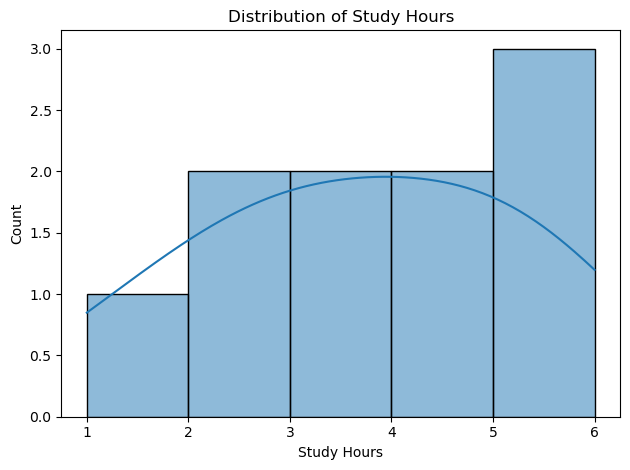

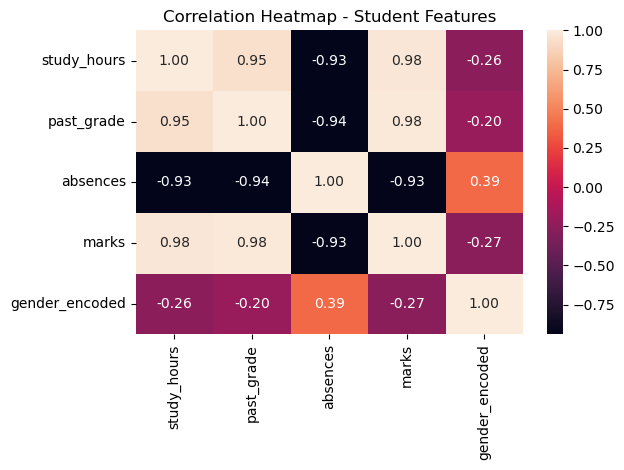

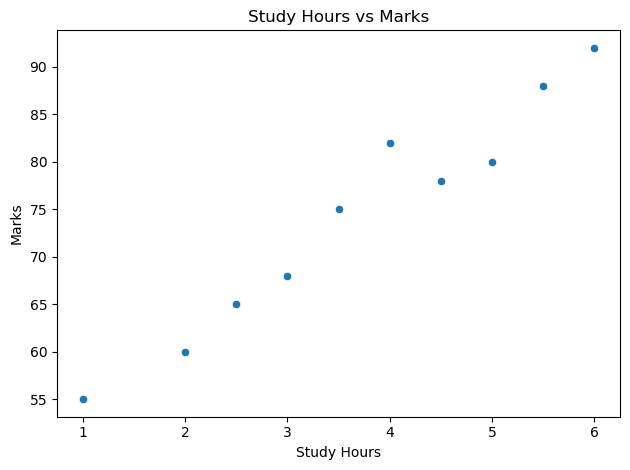

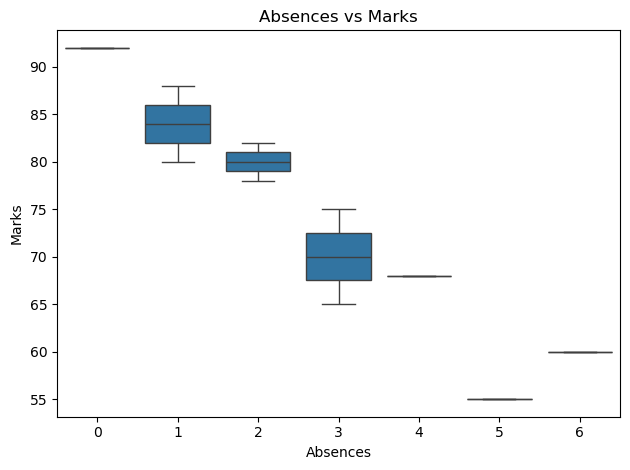

Regression Coefficients (Student Marks):
study_hours: 5.53
past_grade: 0.51
absences: 1.54
Intercept: 11.18

Example interpretation:
Each +1 hour of study increases marks by approx 5.53 (keeping other features same).

Evaluation Metrics (Student Model):
MAE: 2.4689176975653857
MSE: 7.839863918272555
R²: 0.9115804821247456 

Model Insights:
1) Most influential feature: study_hours
2) Least useful feature: past_grade
3) Relationship strength (R²): 0.91 (closer to 1 means stronger)


EXERCISE 2: Regression From Scratch

Learned parameters (from scratch):
m (coefficients): [4.86200221 4.42166242 4.86200221]
c (intercept): 59.99999989902195 



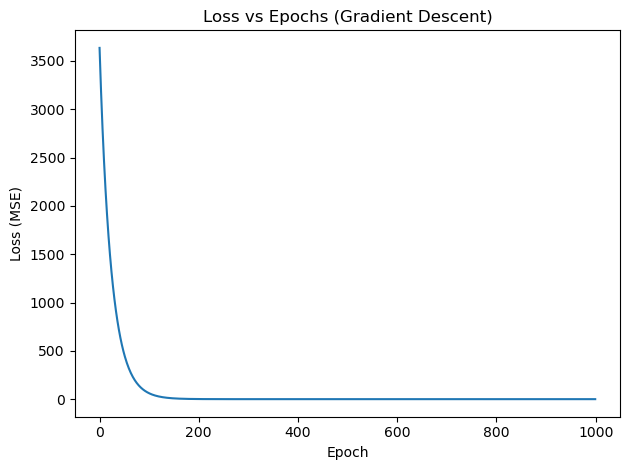

Predicted marks (from scratch model):
4 hours, 12 assignments, 85% attendance → 69.62
6 hours, 15 assignments, 92% attendance → 85.05


PART 3: Real-World Regression Problems

Problem 1 — Grocery Spend Prediction
Predicted grocery spend for Income=60000, Family=4, Orders=12: 6992.040673211781 

Problem 2 — Energy Consumption
Correlations with Energy_Consumed:
Temperature      0.990217
Humidity         0.993280
Appliances_On    0.992774
Name: Energy_Consumed, dtype: float64 

Feature with highest correlation: Humidity 

Predicted energy for Temp=31, Humidity=63, Appliances=5: 239.0 


PART 4: Algorithmic Helpers

Normalized Hours: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
Normalized Assignments: [-1.35439836 -0.79006571  0.05643326  0.62076591  1.46726488]
Normalized Attendance: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356] 

Example remove_outliers_iqr on energy_df:
   Temperature  Humidity  Appliances_On  Energy_Consumed
0           28        60    

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


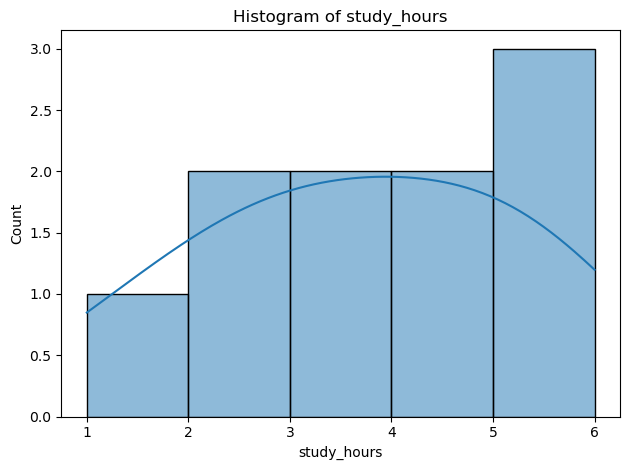

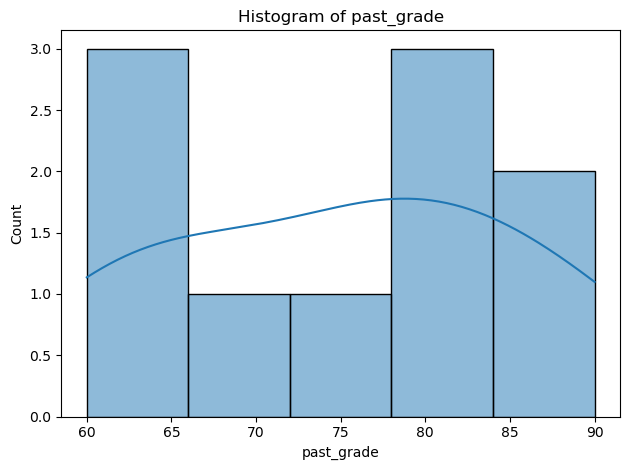

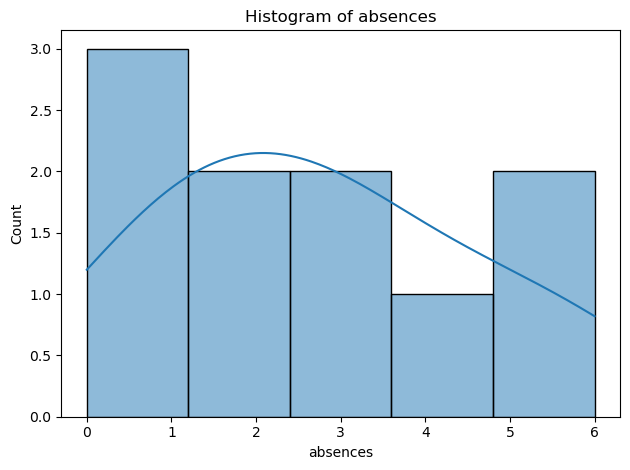

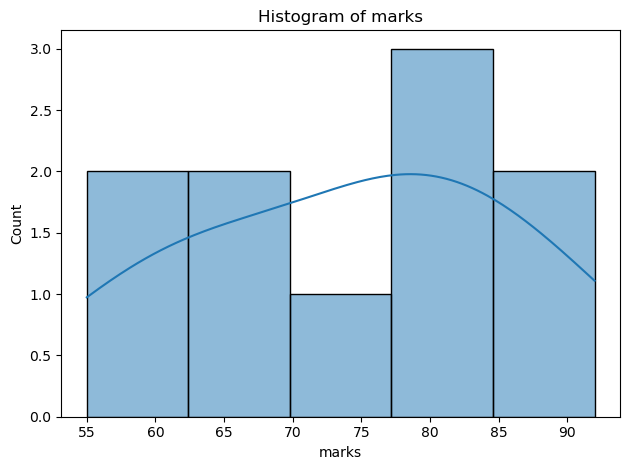

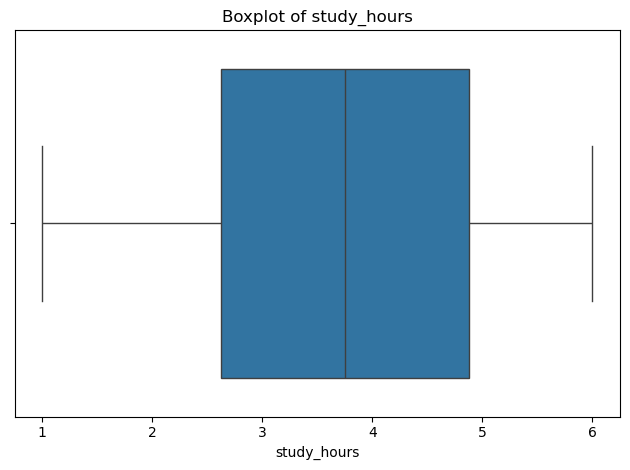

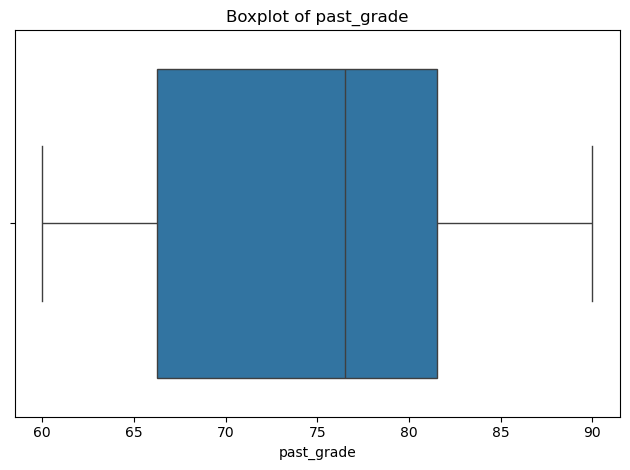

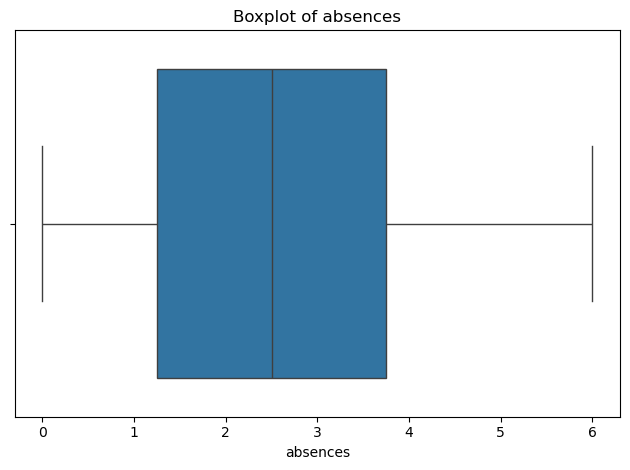

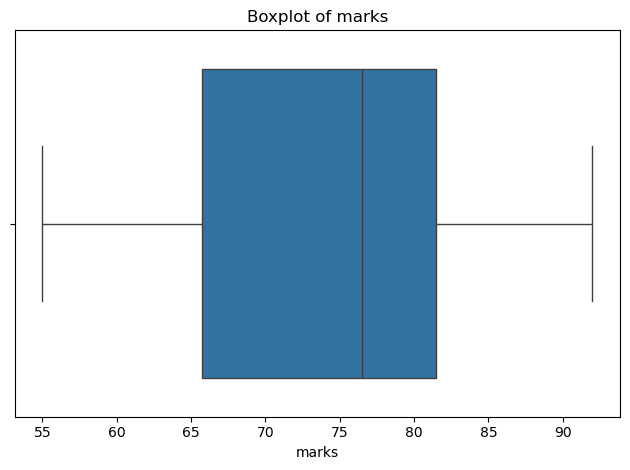

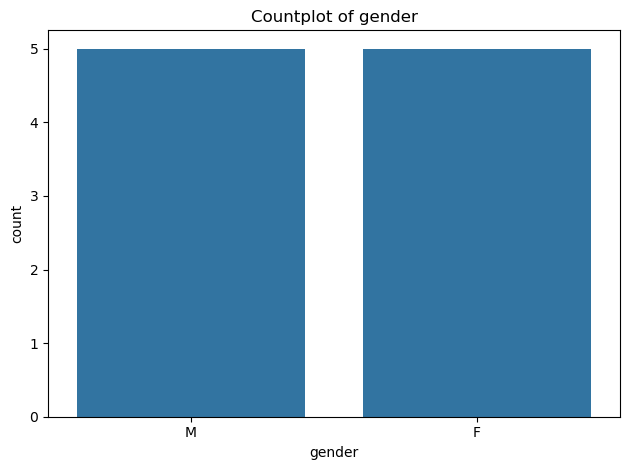


PART 6: Fitness Score Challenge

Fitness Dataset:
   Exercise_Hours  Calories_Burned  Steps  Fitness_Score
0               1              100   3000             40
1               2              200   6000             55
2               3              280   7500             65
3               4              350   9000             78
4               5              450  12000             90 

Fitness model metrics:
MAE: 6.161483360032854
MSE: 40.21387719596186
R²: 0.8686893805846143 

Predicted Fitness Score for:
3.5 hours, 290 calories, 8000 steps → 63.120613839939764

ALL SECTIONS COMPLETED SUCCESSFULLY ✅


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [3]:
# ============================================
# ML PRACTICE NOTEBOOK - COMPLETE CODE
# ============================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make plots a bit nicer
plt.style.use("default")

# ==========================================================
# EXERCISE 1 — STUDENT PERFORMANCE EDA + REGRESSION
# ==========================================================

print("\n============================")
print("EXERCISE 1: Student Performance")
print("============================\n")

# ----- Step 0: Create a sample student dataset -----
student_data = {
    "gender": ["M","F","F","M","F","M","F","M","F","M"],
    "study_hours": [1.0, 2.5, 3.0, 4.5, 5.0, 2.0, 6.0, 3.5, 4.0, 5.5],
    "past_grade":  [60, 70, 65, 80, 78, 62, 90, 75, 82, 88],
    "absences":    [5, 3, 4, 2, 1, 6, 0, 3, 2, 1],
    "marks":       [55, 65, 68, 78, 80, 60, 92, 75, 82, 88]
}
df_student = pd.DataFrame(student_data)

print("Sample Student Data:")
print(df_student.head(), "\n")

# ----- Step 1: Clean the Data -----
# Remove duplicates
df_student = df_student.drop_duplicates()

# Handle missing values (none here, but showing method)
df_student = df_student.fillna(df_student.mean(numeric_only=True))

# Convert categorical → numeric (gender)
le = LabelEncoder()
df_student["gender_encoded"] = le.fit_transform(df_student["gender"])

# Normalize marks (0–1 range)
scaler = MinMaxScaler()
df_student["marks_norm"] = scaler.fit_transform(df_student[["marks"]])

print("After Encoding + Normalizing:")
print(df_student.head(), "\n")

# ----- Step 2: Visualizations -----
print("Generating visualizations...")

# 1) Distribution of study hours
plt.figure()
sns.histplot(df_student["study_hours"], kde=True)
plt.title("Distribution of Study Hours")
plt.xlabel("Study Hours")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 2) Correlation heatmap
plt.figure()
sns.heatmap(df_student[["study_hours","past_grade","absences","marks","gender_encoded"]].corr(),
            annot=True, fmt=".2f")
plt.title("Correlation Heatmap - Student Features")
plt.tight_layout()
plt.show()

# 3) Scatter: hours studied vs marks
plt.figure()
sns.scatterplot(x="study_hours", y="marks", data=df_student)
plt.title("Study Hours vs Marks")
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()

# 4) Boxplot of absences vs marks
plt.figure()
sns.boxplot(x="absences", y="marks", data=df_student)
plt.title("Absences vs Marks")
plt.xlabel("Absences")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()

# ----- Step 3: Build Regression Model -----
X = df_student[["study_hours", "past_grade", "absences"]]
y = df_student["marks"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model_student = LinearRegression()
model_student.fit(X_train, y_train)

# ----- Step 4: Interpret Coefficients -----
print("Regression Coefficients (Student Marks):")
for feature, coef in zip(X.columns, model_student.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model_student.intercept_:.2f}\n")

print("Example interpretation:")
print(f"Each +1 hour of study increases marks by approx {model_student.coef_[0]:.2f} (keeping other features same).\n")

# ----- Step 5: Evaluate -----
y_pred = model_student.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Evaluation Metrics (Student Model):")
print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2, "\n")

# ----- Step 6: Model Analysis (Print Insights) -----
coefs = pd.Series(model_student.coef_, index=X.columns)
most_influential = coefs.abs().idxmax()
least_influential = coefs.abs().idxmin()

print("Model Insights:")
print(f"1) Most influential feature: {most_influential}")
print(f"2) Least useful feature: {least_influential}")
print(f"3) Relationship strength (R²): {r2:.2f} (closer to 1 means stronger)\n")

# ==========================================================
# EXERCISE 2 — LINEAR REGRESSION FROM SCRATCH (NUMPY)
# ==========================================================

print("\n============================")
print("EXERCISE 2: Regression From Scratch")
print("============================\n")

# Dataset:
# Hours, Assignments_Submitted, Attendance, Marks
data = np.array([
    [1,  5, 70, 40],
    [2,  7, 75, 50],
    [3, 10, 80, 60],
    [4, 12, 85, 70],
    [5, 15, 90, 80]
])

X = data[:, :3]   # features
y = data[:, 3]    # target

# ----- Step 1: Convert to Numpy Arrays (already numpy) -----

# ----- Step 2: Normalize features -----
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

# ----- Step 3: Initialize parameters -----
n_samples, n_features = X_norm.shape
m = np.zeros(n_features)
c = 0.0

# ----- Step 4: Gradient Descent -----
def compute_loss(X, y, m, c):
    y_pred = X.dot(m) + c
    return np.mean((y_pred - y)**2)

learning_rate = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = X_norm.dot(m) + c
    error = y_pred - y

    dm = (2 / n_samples) * X_norm.T.dot(error)
    dc = (2 / n_samples) * np.sum(error)

    m -= learning_rate * dm
    c -= learning_rate * dc

    current_loss = compute_loss(X_norm, y, m, c)
    losses.append(current_loss)

print("Learned parameters (from scratch):")
print("m (coefficients):", m)
print("c (intercept):", c, "\n")

# ----- Step 5: Plot loss vs epochs -----
plt.figure()
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Loss vs Epochs (Gradient Descent)")
plt.tight_layout()
plt.show()

# ----- Step 6: Predictions -----
def predict_from_scratch(features_array):
    # features_array shape: (n_samples, 3)
    features_norm = (features_array - X_mean) / X_std
    return features_norm.dot(m) + c

test_points = np.array([
    [4, 12, 85],
    [6, 15, 92]
])

pred_marks = predict_from_scratch(test_points)
print("Predicted marks (from scratch model):")
print(f"4 hours, 12 assignments, 85% attendance → {pred_marks[0]:.2f}")
print(f"6 hours, 15 assignments, 92% attendance → {pred_marks[1]:.2f}\n")

# ==========================================================
# PART 3 — REAL-WORLD ML WORKFLOW PROBLEMS
# ==========================================================

print("\n============================")
print("PART 3: Real-World Regression Problems")
print("============================\n")

# ---------- Problem 1: Monthly Grocery Spending ----------
print("Problem 1 — Grocery Spend Prediction")

grocery_df = pd.DataFrame([
    [45000,4,12,5800],
    [65000,5,8,7200],
    [32000,3,5,4100],
    [55000,4,10,6500],
    [72000,6,15,8800]
], columns=["Income","Family_Size","Online_Orders","Monthly_Grocery_Spend"])

X_g = grocery_df[["Income","Family_Size","Online_Orders"]]
y_g = grocery_df["Monthly_Grocery_Spend"]

model_grocery = LinearRegression()
model_grocery.fit(X_g, y_g)

pred_grocery = model_grocery.predict([[60000,4,12]])[0]
print("Predicted grocery spend for Income=60000, Family=4, Orders=12:", pred_grocery, "\n")

# ---------- Problem 2: Energy Consumption ----------
print("Problem 2 — Energy Consumption")

energy_df = pd.DataFrame([
    [28,60,4,220],
    [30,65,5,250],
    [26,55,3,180],
    [32,70,6,300],
    [27,58,4,210]
], columns=["Temperature","Humidity","Appliances_On","Energy_Consumed"])

X_e = energy_df[["Temperature","Humidity","Appliances_On"]]
y_e = energy_df["Energy_Consumed"]

model_energy = LinearRegression()
model_energy.fit(X_e, y_e)

correlations = energy_df.corr()["Energy_Consumed"].drop("Energy_Consumed")
print("Correlations with Energy_Consumed:")
print(correlations, "\n")
print("Feature with highest correlation:", correlations.abs().idxmax(), "\n")

pred_energy = model_energy.predict([[31,63,5]])[0]
print("Predicted energy for Temp=31, Humidity=63, Appliances=5:", pred_energy, "\n")

# ==========================================================
# PART 4 — ALGORITHMIC THINKING
# ==========================================================

print("\n============================")
print("PART 4: Algorithmic Helpers")
print("============================\n")

# 1. Numpy-based Algorithm: Feature Normalization
def normalize_feature(x):
    return (x - x.mean()) / x.std()

example_hours = np.array([1,2,3,4,5])
example_assignments = np.array([5,7,10,12,15])
example_attendance = np.array([70,75,80,85,90])

print("Normalized Hours:", normalize_feature(example_hours))
print("Normalized Assignments:", normalize_feature(example_assignments))
print("Normalized Attendance:", normalize_feature(example_attendance), "\n")

# 2. Pandas Algorithm: Remove Outliers Automatically (IQR)
def remove_outliers_iqr(df, cols=None):
    if cols is None:
        cols = df.select_dtypes(include=[np.number]).columns
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
    return df[mask]

print("Example remove_outliers_iqr on energy_df:")
print(remove_outliers_iqr(energy_df), "\n")

# 3. Mini EDA Algorithm
def mini_eda(df):
    print("Missing values:\n", df.isnull().sum(), "\n")
    print("Duplicates:", df.duplicated().sum(), "\n")
    corr = df.corr()
    print("Correlation matrix:\n", corr, "\n")
    target = corr.columns[-1]
    print(f"Top 3 strongest correlations with {target}:")
    print(corr[target].drop(target).abs().sort_values(ascending=False).head(3), "\n")

print("Mini EDA on grocery_df:")
mini_eda(grocery_df)

# 4. Visualization Algorithm
def auto_visualize(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns

    # Histograms
    for col in numeric_cols:
        plt.figure()
        sns.histplot(df[col], kde=True)
        plt.title(f"Histogram of {col}")
        plt.tight_layout()
        plt.show()

    # Boxplots
    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")
        plt.tight_layout()
        plt.show()

    # Countplots
    for col in cat_cols:
        plt.figure()
        sns.countplot(x=df[col])
        plt.title(f"Countplot of {col}")
        plt.tight_layout()
        plt.show()

print("Auto-visualizing student dataset (numeric + categorical)...")
auto_visualize(df_student[["gender","study_hours","past_grade","absences","marks"]])

# ==========================================================
# PART 6 — FINAL MINI CHALLENGE (Fitness Score)
# ==========================================================

print("\n============================")
print("PART 6: Fitness Score Challenge")
print("============================\n")

fitness_df = pd.DataFrame({
    "Exercise_Hours":  [1, 2, 3, 4, 5],
    "Calories_Burned": [100, 200, 280, 350, 450],
    "Steps":           [3000, 6000, 7500, 9000, 12000],
    "Fitness_Score":   [40, 55, 65, 78, 90]
})

print("Fitness Dataset:")
print(fitness_df, "\n")

X_f = fitness_df[["Exercise_Hours","Calories_Burned","Steps"]]
y_f = fitness_df["Fitness_Score"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_f, y_f, test_size=0.4, random_state=42
)

model_fitness = LinearRegression()
model_fitness.fit(X_train_f, y_train_f)

y_pred_f = model_fitness.predict(X_test_f)

print("Fitness model metrics:")
print("MAE:", mean_absolute_error(y_test_f, y_pred_f))
print("MSE:", mean_squared_error(y_test_f, y_pred_f))
print("R²:", r2_score(y_test_f, y_pred_f), "\n")

# Predict for:
# 3.5 hours exercise, 290 calories, 8000 steps
test_input = np.array([[3.5, 290, 8000]])
fitness_pred = model_fitness.predict(test_input)[0]
print("Predicted Fitness Score for:")
print("3.5 hours, 290 calories, 8000 steps →", fitness_pred)
print("\nALL SECTIONS COMPLETED SUCCESSFULLY ✅")
